# 1.) PHASE SPACE EXPLORATION


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.cm as cm
import sympy as sp
from scipy.optimize import fsolve

In [16]:
# Parameters taken from fit-gLV-sat-all-Md3 of PM3 fit from pacman paper

uEc_c = 0.033328281132065346 # Ec control growth rate
uEc = 0.033328281132065346 # Ec producing bacteriocin growth rate 
uEf = 0.0363320961794854  # Ef growth rate

M11 = 0.03872987667387545 # Ec -> Ec
M22 = 0.0888612551920666 # Ef -> Ef
M12 = 0.0493339883772232 # Ef -> Ec

M21_EntA = 0.0222552935928312 # EcEntA -> Ef              
M21_EntB = 0.0241836699300289 # EcEntB -> Ef              
M21_EntAB = 0.02403055087682115 # EcEntAB -> Ef            

Ks_EntA = 0.00121512703046095 # Half Maximum EntA
Ks_EntB = 0.292047702641047 # Half Maximum EntB
Ks_EntAB = 0.015223212927133401 # Half Maximum EntAB


#### 1.1 Enterocin A

/var/folders/15/kytdww351dxg0pnzc0767j340000gn/T/ipykernel_37760/3575605083.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('plasma', 25)


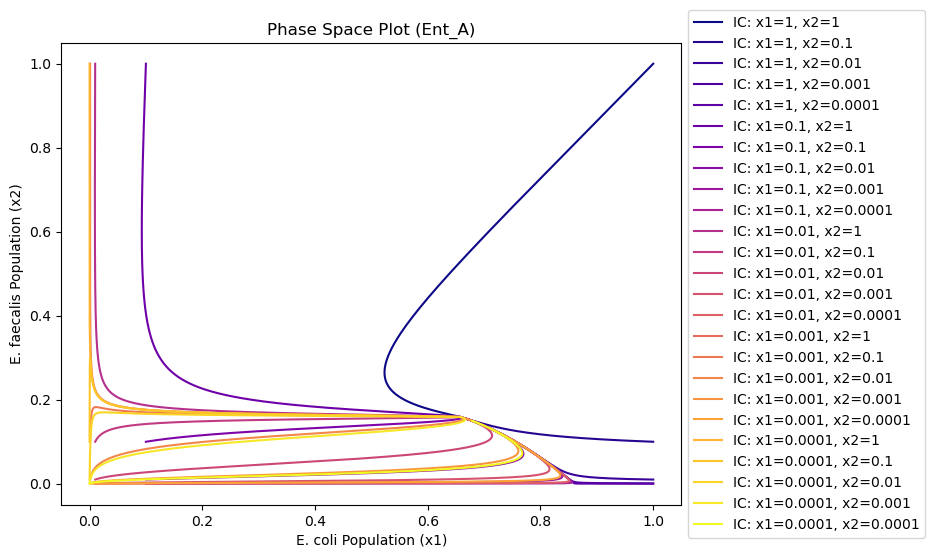

In [4]:
def lotka_volterra_saturated(X, t, uEc, uEf, M11, M22, M12, M21_EntA, Ks_EntA):
    x1, x2 = X
    dx1_dt = x1*uEc - x1*M11*x1 - x1*M12*x2
    dx2_dt = x2*uEf - x2*M22*x2 - (x2*M21_EntA*x1/(Ks_EntA+x1))
    return np.array([dx1_dt, dx2_dt])



# Time points
t = np.linspace(0, 601, 1000)

# Plotting Phase Space
plt.figure(figsize=(8, 6))
cmap = plt.cm.get_cmap('plasma', 25)
color_index = 0

# Same as above but this time plotting x1 against x2 
for x1_initial in [1, 0.1, 0.01, 0.001, 0.0001]:
    for x2_initial in [1, 0.1, 0.01, 0.001, 0.0001]:
        initial_conditions = [x1_initial, x2_initial]
        args = (uEc, uEf, M11, M22, M12, M21_EntA, Ks_EntA)
        solution = odeint(lotka_volterra_saturated, initial_conditions, t, args=args)
        x1, x2 = solution.T
        plt.plot(x1, x2, label=f"IC: x1={x1_initial}, x2={x2_initial}", color=cmap(color_index))
        color_index += 1


# Plotting & Labelling
plt.xlabel('E. coli Population (x1)')
plt.ylabel('E. faecalis Population (x2)')
plt.title('Phase Space Plot (Ent_A)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### 1.2 Enterocin B

/var/folders/15/kytdww351dxg0pnzc0767j340000gn/T/ipykernel_37760/1208440160.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('plasma', 25)


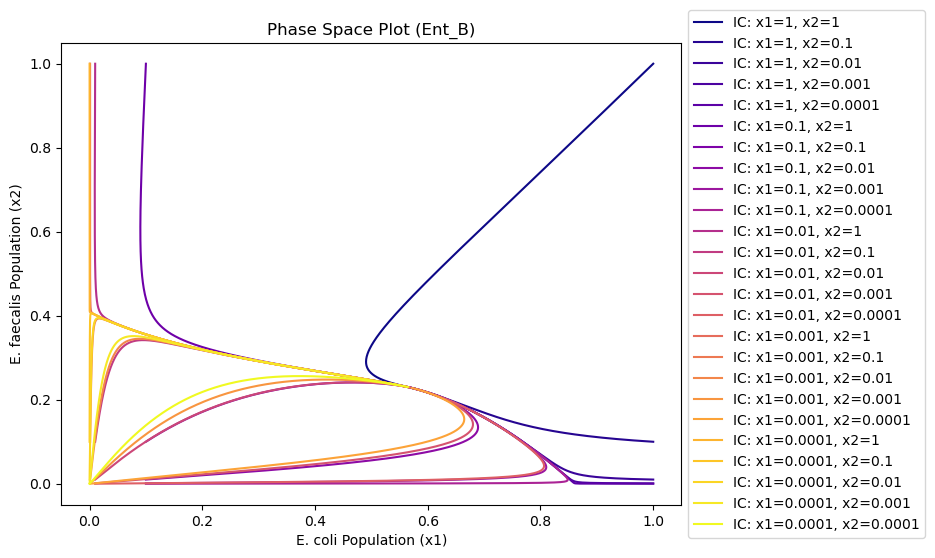

In [5]:
def lotka_volterra_saturated(X, t, uEc, uEf, M11, M22, M12, M21_EntB, Ks_EntB):
    x1, x2 = X
    dx1_dt = x1*uEc - x1*M11*x1 - x1*M12*x2
    dx2_dt = x2*uEf - x2*M22*x2 - (x2*M21_EntB*x1/(Ks_EntB+x1))
    return np.array([dx1_dt, dx2_dt])


# Time points
t = np.linspace(0, 601, 1000)


# Plotting Phase Space
cmap = plt.cm.get_cmap('plasma', 25)
plt.figure(figsize=(8, 6))
color_index = 0

# Same as above but this time plotting x1 against x2 
for x1_initial in [1, 0.1, 0.01, 0.001, 0.0001]:
    for x2_initial in [1, 0.1, 0.01, 0.001, 0.0001]:
        initial_conditions = [x1_initial, x2_initial]
        args = (uEc, uEf, M11, M22, M12, M21_EntB, Ks_EntB)
        solution = odeint(lotka_volterra_saturated, initial_conditions, t, args=args)
        x1, x2 = solution.T
        plt.plot(x1, x2, label=f"IC: x1={x1_initial}, x2={x2_initial}", color=cmap(color_index))
        color_index += 1


# Plotting & Labels
plt.xlabel('E. coli Population (x1)')
plt.ylabel('E. faecalis Population (x2)')
plt.title('Phase Space Plot (Ent_B)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### 1.3 Enterocin AB

/var/folders/15/kytdww351dxg0pnzc0767j340000gn/T/ipykernel_37760/635289375.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('plasma', 25)


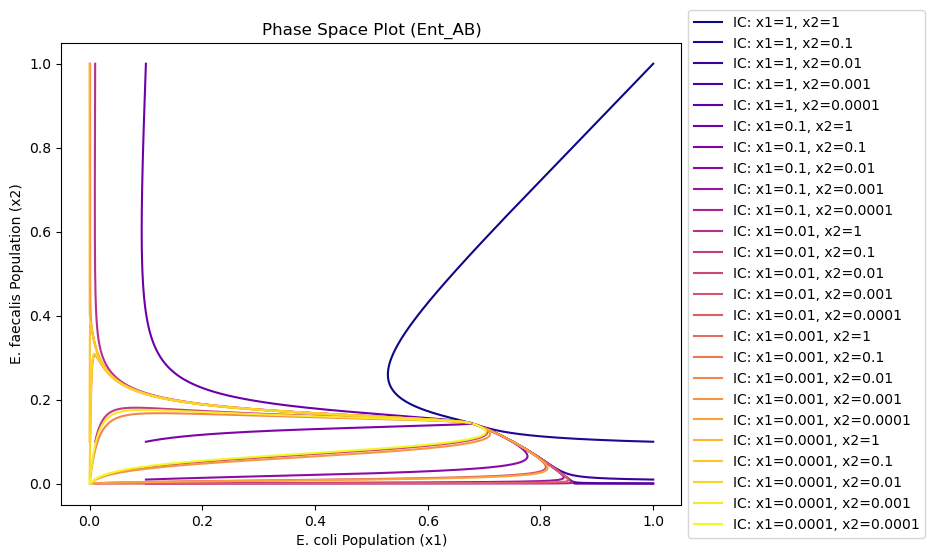

In [6]:
def lotka_volterra_saturated(X, t, uEc, uEf, M11, M22, M12, M21_EntAB, Ks_EntAB):
    x1, x2 = X
    dx1_dt = x1*uEc - x1*M11*x1 - x1*M12*x2
    dx2_dt = x2*uEf - x2*M22*x2 - (x2*M21_EntAB*x1/(Ks_EntAB+x1))
    return np.array([dx1_dt, dx2_dt])


# Time points
t = np.linspace(0, 601, 1000)

# Plotting Phase Space
plt.figure(figsize=(8, 6))
cmap = plt.cm.get_cmap('plasma', 25)
color_index = 0

# Same as above but this time plotting x1 against x2 
for x1_initial in [1, 0.1, 0.01, 0.001, 0.0001]:
    for x2_initial in [1, 0.1, 0.01, 0.001, 0.0001]:
        initial_conditions = [x1_initial, x2_initial]
        args = (uEc, uEf, M11, M22, M12, M21_EntAB, Ks_EntAB)
        solution = odeint(lotka_volterra_saturated, initial_conditions, t, args=args)
        x1, x2 = solution.T
        plt.plot(x1, x2, label=f"IC: x1={x1_initial}, x2={x2_initial}", color=cmap(color_index))
        color_index += 1

# Plotting & Labels
plt.xlabel('E. coli Population (x1)')
plt.ylabel('E. faecalis Population (x2)')
plt.title('Phase Space Plot (Ent_AB)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# 2.) STEADY STATE EXPLORATION
- Steady states found by setting differential equations = 0 and solving for x1 and x2 
- Steady states represent the population sizes of species at equilibrium.
- 3 ways of solving: (i) Symbolically, (ii) Numerically, (iii) by hand.
- Symbolically preferred but it takes ages to run in my Jupyter Environment


### 2.1 Solving for x1 and x2 Symbolically

In [9]:
# Defining the symbols
x1, x2 = sp.symbols('x1 x2')
uEc, uEf, M11, M22, M12, M21_EntA, M21_EntB, M21_EntAB, Ks_EntA, Ks_EntB, Ks_EntAB  = sp.symbols('uEc, uEf M11 M22 M12 M21_EntA M21_EntB M21_EntAB Ks_EntA Ks_EntB Ks_EntAB')

# Defining the parameters
param_values = {uEc: 0.033328281132065346, uEf: 0.0363320961794854,
                 M11: 0.03872987667387545, M22: 0.0888612551920666,
                 M12: 0.0493339883772232, M21_EntA: 0.0222552935928312,
                 M21_EntB:0.0241836699300289, M21_EntAB:0.02403055087682115,
                 Ks_EntA: 0.00121512703046095, Ks_EntB:0.292047702641047,
                 Ks_EntAB: 0.015223212927133401 }

#### 2.1.1 Enterocin A

In [10]:
# LV equations & solving for 0 symbolically
eq1 = sp.Eq(x1*uEc - x1*M11*x1 - x1*M12*x2, 0)
eq2 = sp.Eq(x2*uEf - x2*M22*x2 - (x2*M21_EntA*x1)/(Ks_EntA + x1), 0)

steady_states_EntA = sp.solve((eq1, eq2), (x1, x2))

# Substitute numerical values into the symbolic solutions
steady_states_num_EntA = [(sol[0].subs(param_values), sol[1].subs(param_values)) for sol in steady_states_EntA]

for state in steady_states_num_EntA:
    print(f"Steady state: x1 = {state[0].evalf()}, x2 = {state[1].evalf()}")

KeyboardInterrupt: 

#### 2.1.2 Enterocin B

In [11]:
# LV equations & solving for 0 symbolically
eq1_EntB = sp.Eq(x1*uEc - x1*M11*x1 - x1*M12*x2, 0)
eq2_EntB = sp.Eq(x2*uEf - x2*M22*x2 - (x2*M21_EntB*x1)/(Ks_EntB + x1), 0)

steady_states_EntB = sp.solve((eq1_EntB, eq2_EntB), (x1, x2))

# Substitute numerical values into the symbolic solutions
steady_states_num_EntB = [(sol[0].subs(param_values), sol[1].subs(param_values)) for sol in steady_states_EntB]

for state in steady_states_num_EntB:
    print(f"Steady state: x1 = {state[0].evalf()}, x2 = {state[1].evalf()}")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/zoefleurslendebroek/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/15/kytdww351dxg0pnzc0767j340000gn/T/ipykernel_37760/2958186695.py", line 5, in <module>
    steady_states_EntB = sp.solve((eq1_EntB, eq2_EntB), (x1, x2))
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zoefleurslendebroek/anaconda3/lib/python3.11/site-packages/sympy/solvers/solvers.py", line 1114, in solve
    solution = _solve_system(f, symbols, **flags)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zoefleurslendebroek/anaconda3/lib/python3.11/site-packages/sympy/solvers/solvers.py", line 1889, in _solve_system
    result = solve_poly_system(polys, *symbols)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zoefleurslendebroek/anaconda3/lib/python3.11/site-packages/sympy/solvers/poly

#### 2.1.3 Enterocin AB

In [ ]:
# LV equations & solving for 0 symbolically
eq1_EntAB = sp.Eq(x1*uEc - x1*M11*x1 - x1*M12*x2, 0)
eq2_EntAB = sp.Eq(x2*uEf - x2*M22*x2 - (x2*M21_EntAB*x1)/(Ks_EntAB + x1), 0)

steady_states_EntAB = sp.solve((eq1_EntAB, eq2_EntAB), (x1, x2))

# Substitute numerical values into the symbolic solutions
steady_states_num_EntAB = [(sol[0].subs(param_values), sol[1].subs(param_values)) for sol in steady_states_EntAB]

for state in steady_states_num_EntAB:
    print(f"Steady state: x1 = {state[0].evalf()}, x2 = {state[1].evalf()}")

### 2.2 Solving for x1 and x2 Numerically
- Eyed initial guess from looking at grap
- Would have to do it for a lot of random initial guesses to get all the steady states


In [17]:
def lotka_volterra_saturated_steady_states(X, uEc, uEf, M11, M22, M12, M21_EntA, Ks_EntA):
    x1, x2 = X
    dx1_dt = x1*uEc - x1*M11*x1 - x1*M12*x2
    dx2_dt = x2*uEf - x2*M22*x2 - (x2*M21_EntA*x1/(Ks_EntA+x1))
    return [dx1_dt, dx2_dt]



# Initial guess for the steady states
initial_guess = [0.7, 0.2]

# Steady States calculations
steady_states = fsolve(lotka_volterra_saturated_steady_states, initial_guess, args=(uEc, uEf, M11, M22, M12, M21_EntA, Ks_EntA))
print(f'Steady state: E. coli (x1) = {steady_states[0]}, E. faecalis (x2) = {steady_states[1]}')

Steady state: E. coli (x1) = 0.6581573411886995, E. faecalis (x2) = 0.1588748190373312


# 3.) PHASE SPACE WITH STEADY STATES


#### 3.1 Enterocin A


/var/folders/15/kytdww351dxg0pnzc0767j340000gn/T/ipykernel_37760/2177339800.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('plasma', 25)


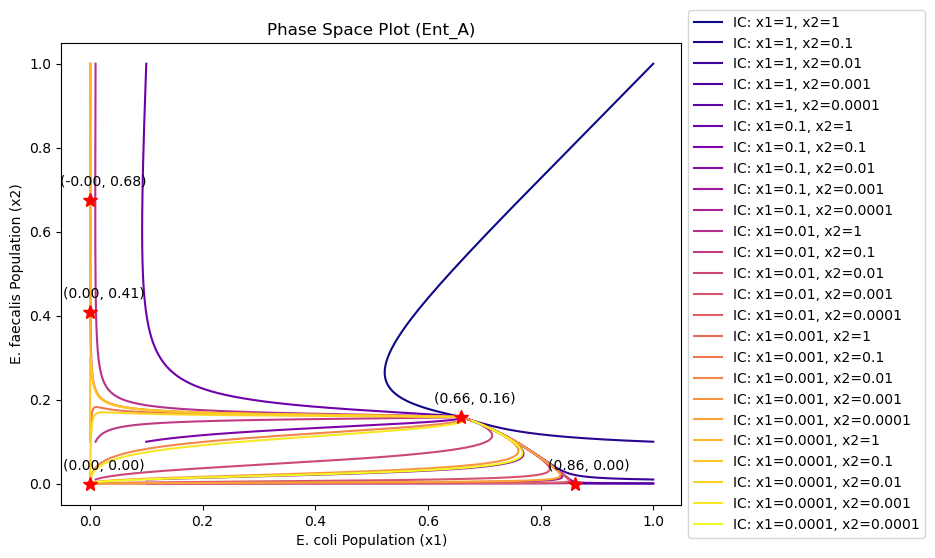

In [18]:
def lotka_volterra_saturated(X, t, uEc, uEf, M11, M22, M12, M21_EntA, Ks_EntA):
    x1, x2 = X
    dx1_dt = x1*uEc - x1*M11*x1 - x1*M12*x2
    dx2_dt = x2*uEf - x2*M22*x2 - (x2*M21_EntA*x1/(Ks_EntA+x1))
    return np.array([dx1_dt, dx2_dt])

# Time points
t = np.linspace(0, 601, 1000)

# Plotting Phase Space
plt.figure(figsize=(8, 6))
cmap = plt.cm.get_cmap('plasma', 25)
color_index = 0

# Plotting x1 against x2 for different initial conditions
for x1_initial in [1, 0.1, 0.01, 0.001, 0.0001]:
    for x2_initial in [1, 0.1, 0.01, 0.001, 0.0001]:
        initial_conditions = [x1_initial, x2_initial]
        args = (uEc, uEf, M11, M22, M12, M21_EntA, Ks_EntA)
        solution = odeint(lotka_volterra_saturated, initial_conditions, t, args=args)
        x1, x2 = solution.T
        plt.plot(x1, x2, label=f"IC: x1={x1_initial}, x2={x2_initial}", color=cmap(color_index))
        color_index += 1

# Plotting the steady states for EntA
steady_states_EntA = [(-0.0006, 0.6761), (0, 0), (0, 0.4089), (0.6582, 0.1589), (0.8605, 0)]

for x1, x2 in steady_states_EntA:
    plt.plot(x1, x2,'r*', markersize='10')  # 'ro' plots a red dot
    plt.annotate(f'({x1:.2f}, {x2:.2f})', (x1, x2), textcoords="offset points", xytext=(10, 10), ha='center')


# Plotting & Labels
plt.xlabel('E. coli Population (x1)')
plt.ylabel('E. faecalis Population (x2)')
plt.title('Phase Space Plot (Ent_A)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


#### 3.2 Enterocin B


/var/folders/15/kytdww351dxg0pnzc0767j340000gn/T/ipykernel_37760/1109570891.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('plasma', 25)


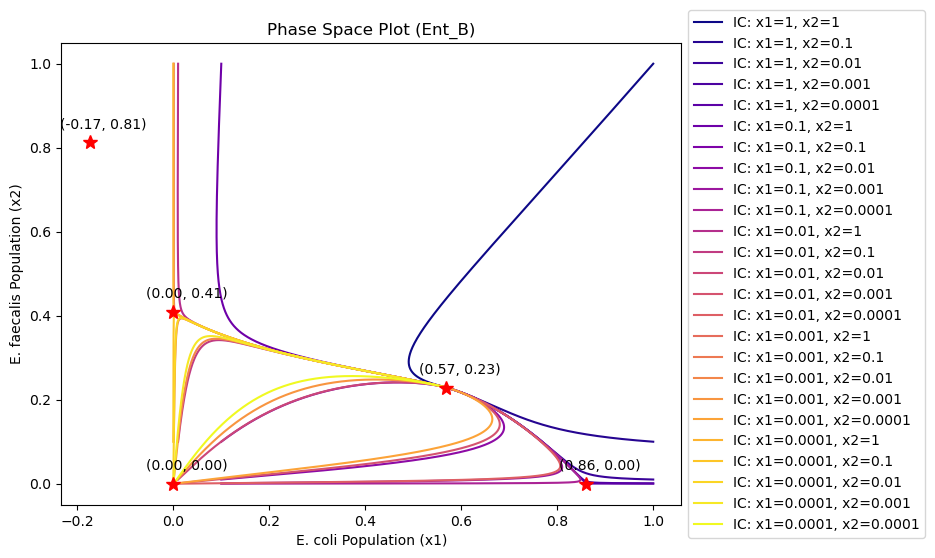

In [19]:
def lotka_volterra_saturated(X, t, uEc, uEf, M11, M22, M12, M21_EntB, Ks_EntB):
    x1, x2 = X
    dx1_dt = x1*uEc - x1*M11*x1 - x1*M12*x2
    dx2_dt = x2*uEf - x2*M22*x2 - (x2*M21_EntB*x1/(Ks_EntB+x1))
    return np.array([dx1_dt, dx2_dt])

# Time points
t = np.linspace(0, 601, 1000)

# Plotting Phase Space
plt.figure(figsize=(8, 6))
cmap = plt.cm.get_cmap('plasma', 25)
color_index = 0

# Plotting x1 against x2 for different initial conditions
for x1_initial in [1, 0.1, 0.01, 0.001, 0.0001]:
    for x2_initial in [1, 0.1, 0.01, 0.001, 0.0001]:
        initial_conditions = [x1_initial, x2_initial]
        args = (uEc, uEf, M11, M22, M12, M21_EntB, Ks_EntB)
        solution = odeint(lotka_volterra_saturated, initial_conditions, t, args=args)
        x1, x2 = solution.T
        plt.plot(x1, x2, label=f"IC: x1={x1_initial}, x2={x2_initial}", color=cmap(color_index))
        color_index += 1

# Plotting the steady states for EntB
steady_states_EntB = [(-0.1744, 0.8125), (0, 0), (0, 0.4089), (0.5688, 0.2290), (0.8605, 0)]

for x1, x2 in steady_states_EntB:
    plt.plot(x1, x2, 'r*', markersize='10')  # 'ro' plots a red dot
    plt.annotate(f'({x1:.2f}, {x2:.2f})', (x1, x2), textcoords="offset points", xytext=(10, 10), ha='center')

# Plotting & Labels
plt.xlabel('E. coli Population (x1)')
plt.ylabel('E. faecalis Population (x2)')
plt.title('Phase Space Plot (Ent_B)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### 3.3 Enterocin AB


/var/folders/15/kytdww351dxg0pnzc0767j340000gn/T/ipykernel_37760/1609502942.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('plasma', 25)


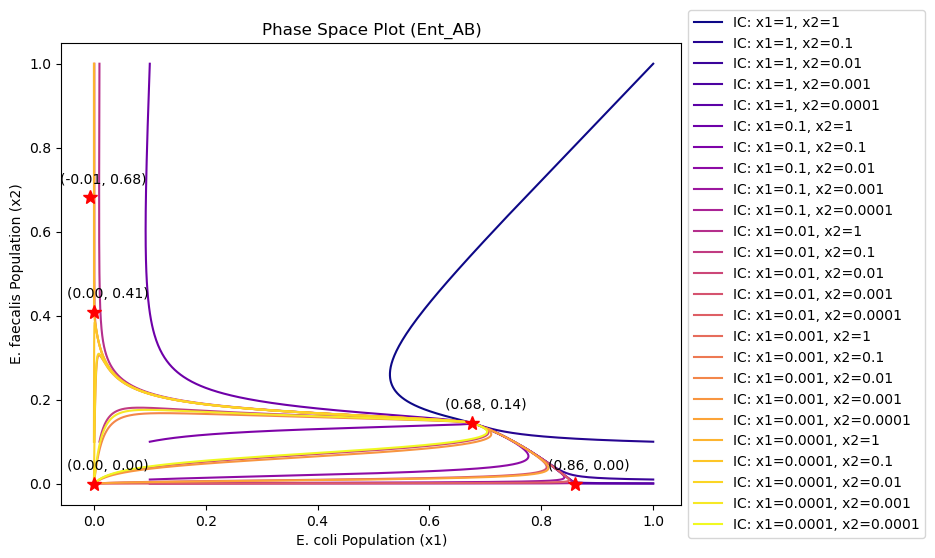

In [20]:
def lotka_volterra_saturated(X, t, uEc, uEf, M11, M22, M12, M21_EntAB, Ks_EntAB):
    x1, x2 = X
    dx1_dt = x1*uEc - x1*M11*x1 - x1*M12*x2
    dx2_dt = x2*uEf - x2*M22*x2 - (x2*M21_EntAB*x1/(Ks_EntAB+x1))
    return np.array([dx1_dt, dx2_dt])


# Time points
t = np.linspace(0, 601, 1000)

# Plotting Phase Space
plt.figure(figsize=(8, 6))
cmap = plt.cm.get_cmap('plasma', 25)
color_index = 0

# Same as above but this time plotting x1 against x2 
for x1_initial in [1, 0.1, 0.01, 0.001, 0.0001]:
    for x2_initial in [1, 0.1, 0.01, 0.001, 0.0001]:
        initial_conditions = [x1_initial, x2_initial]
        args = (uEc, uEf, M11, M22, M12, M21_EntAB, Ks_EntAB)
        solution = odeint(lotka_volterra_saturated, initial_conditions, t, args=args)
        x1, x2 = solution.T
        plt.plot(x1, x2, label=f"IC: x1={x1_initial}, x2={x2_initial}", color=cmap(color_index))
        color_index += 1

# Plotting the steady states for Ent_AB
steady_states_AB = [(-0.00764347346859545, 0.681564840445536),
                 (0, 0),
                 (0, 0.408863189035046),
                 (0.676613238695642, 0.144385930993575),
                 (0.860531558432414, 0)]

for x1, x2 in steady_states_AB:
    plt.plot(x1, x2, 'r*', markersize='10')  # 'ro' plots a red dot
    plt.annotate(f'({x1:.2f}, {x2:.2f})', (x1, x2), textcoords="offset points", xytext=(10, 10), ha='center')

# Plotting & Labels
plt.xlabel('E. coli Population (x1)')
plt.ylabel('E. faecalis Population (x2)')
plt.title('Phase Space Plot (Ent_AB)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



# 4. CALCULATING EIGENVALUES
- Calculations of Eigenvalues for each steady state will help us determine whether steady states are unstable or stable
- In the current example below the Jacobian Matrix was calculates by hand and plugged python to calculate the eigenvalues


In [21]:
jacobian_matrix = np.array([[-0.03, -0.04], [0, 0.01]])
print(jacobian_matrix)

[[-0.03 -0.04]
 [ 0.    0.01]]


In [22]:
eigenvalues = np.linalg.eigvals(jacobian_matrix)
print(eigenvalues)

[-0.03  0.01]
